In [1]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
import pickle


In [2]:
## load data
dfheart = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dfheart.head()

## We may deduce that all variables should be numeric while not all variables contain only values in range between 1 and 0, thus standar

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
## info for missing value and data type
dfheart.info()

## all variables contain no null value but complete
## all variable values are numeric 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
## Basic statistics summary of all variables in dataset
dfheart.describe()

## Age group covering from 40 to 95, missing youth
## mean Sex > 0.5, 14.88% more male interviewees

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


[Text(0, 0, '66'), Text(0, 0, '30')]

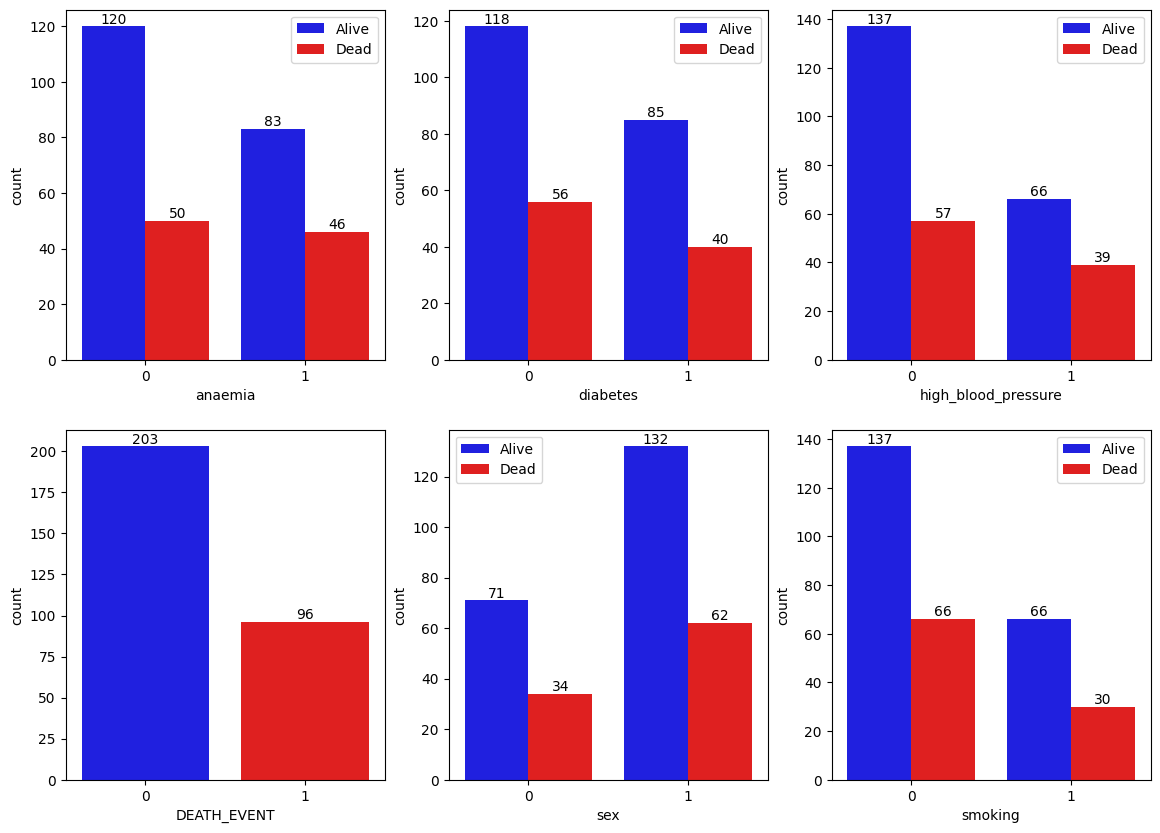

In [5]:
## countplot on all dummy variables
fig, ax = plt.subplots(2,3,figsize=(14,10))
sns.countplot(ax=ax[0,0],data=dfheart, x=dfheart["anaemia"],hue="DEATH_EVENT",palette=["blue","red"])
ax[0,0].legend(['Alive', 'Dead'])
sns.countplot(ax=ax[0,1],data=dfheart, x=dfheart["diabetes"],hue="DEATH_EVENT",palette=["blue","red"])
ax[0,1].legend(['Alive', 'Dead'])
sns.countplot(ax=ax[0,2],data=dfheart, x=dfheart["high_blood_pressure"],hue="DEATH_EVENT",palette=["blue","red"])
ax[0,2].legend(['Alive', 'Dead'])
sns.countplot(ax=ax[1,0],data=dfheart, x=dfheart["DEATH_EVENT"],palette=["blue","red"])
sns.countplot(ax=ax[1,1],data=dfheart, x=dfheart["sex"],hue="DEATH_EVENT",palette=["blue","red"])
ax[1,1].legend(['Alive', 'Dead'])
sns.countplot(ax=ax[1,2],data=dfheart, x=dfheart["smoking"],hue="DEATH_EVENT",palette=["blue","red"])
ax[1,2].legend(['Alive', 'Dead'])
ax[0,0].bar_label(ax[0,0].containers[0])
ax[0,0].bar_label(ax[0,0].containers[1])
ax[0,1].bar_label(ax[0,1].containers[0])
ax[0,1].bar_label(ax[0,1].containers[1])
ax[0,2].bar_label(ax[0,2].containers[0])
ax[0,2].bar_label(ax[0,2].containers[1])
ax[1,0].bar_label(ax[1,0].containers[0])
ax[1,1].bar_label(ax[1,1].containers[0])
ax[1,1].bar_label(ax[1,1].containers[1])
ax[1,2].bar_label(ax[1,2].containers[0])
ax[1,2].bar_label(ax[1,2].containers[1])

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

<AxesSubplot: >

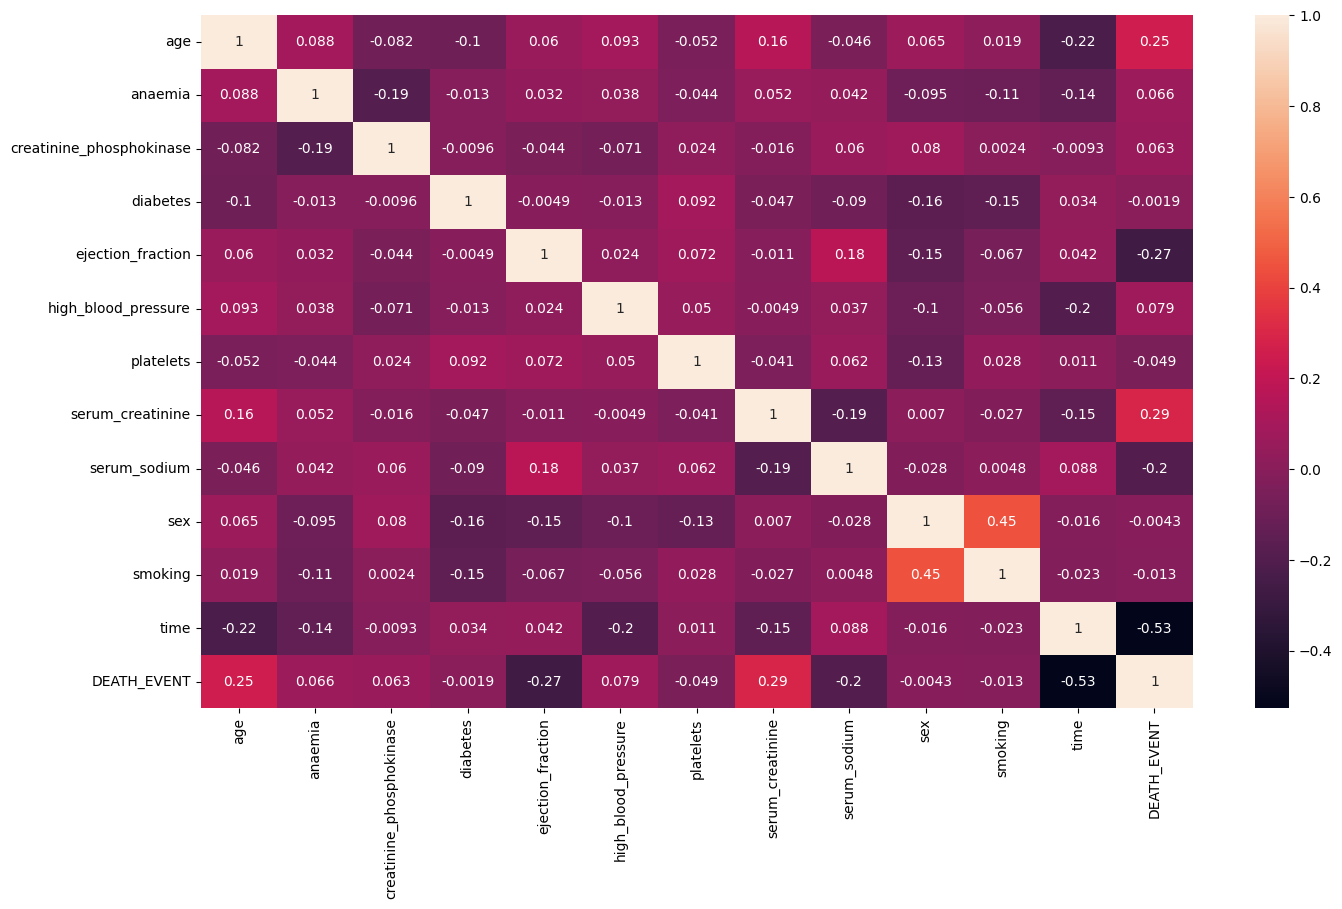

In [6]:
## Correlation Matrix
mt = dfheart.corr()
print(mt)
fig, ax=plt.subplots(figsize=(16,9))
sns.heatmap(mt, annot=True, square=False)

Text(0.5, 1.0, 'Age Distribution for Population Alive and Dead')

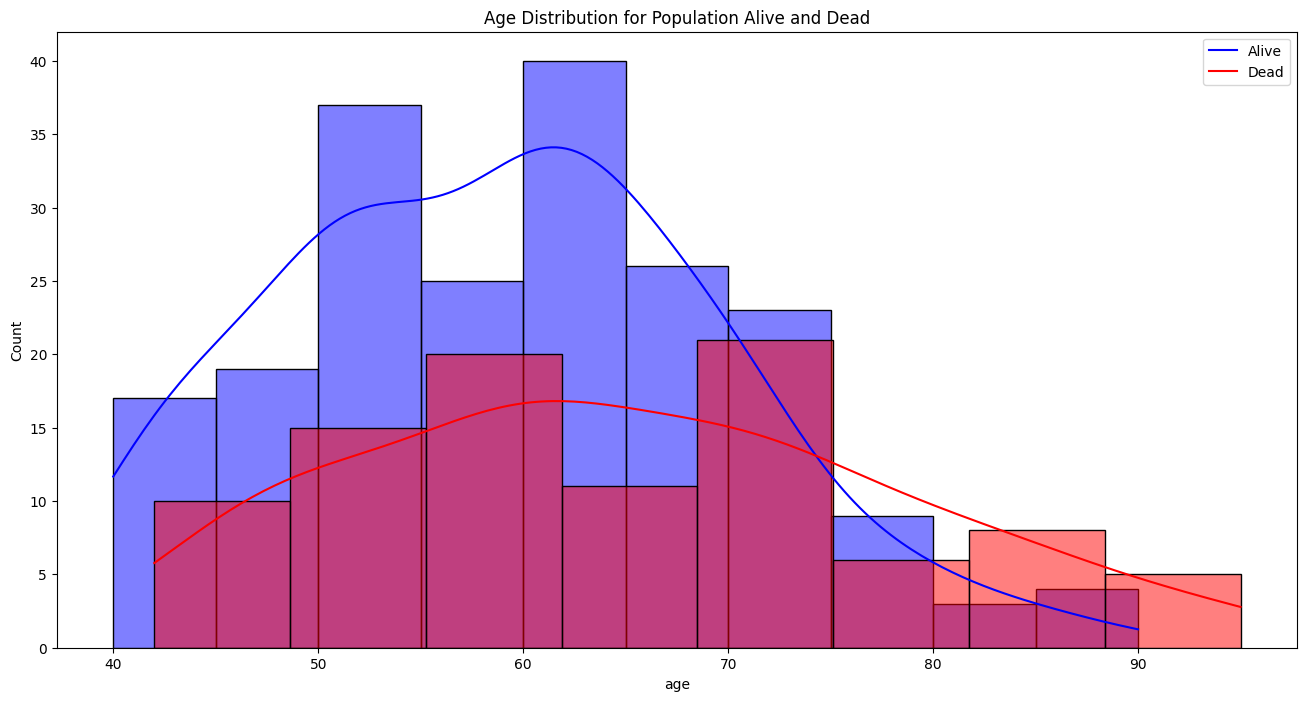

In [7]:
## Visualise the population age distribution between the alive and the dead
plt.figure(figsize=(16,8))
ax = sns.histplot(dfheart["age"][dfheart.DEATH_EVENT == 0], color="blue", kde=True), sns.histplot(dfheart["age"][dfheart.DEATH_EVENT == 1], color="red", kde=True)
plt.legend(['Alive', 'Dead'])
plt.title('Age Distribution for Population Alive and Dead')

## Older people are more likely to be dead than alive, the younger ones are in opposite situation
## however, the age data in general is not normally distributed given that it is right-skewed with big left tail, due to missing youth population data and extremely old outliers.

Text(0.5, 1.0, 'Follow-up Time Distribution for Population Alive and Dead')

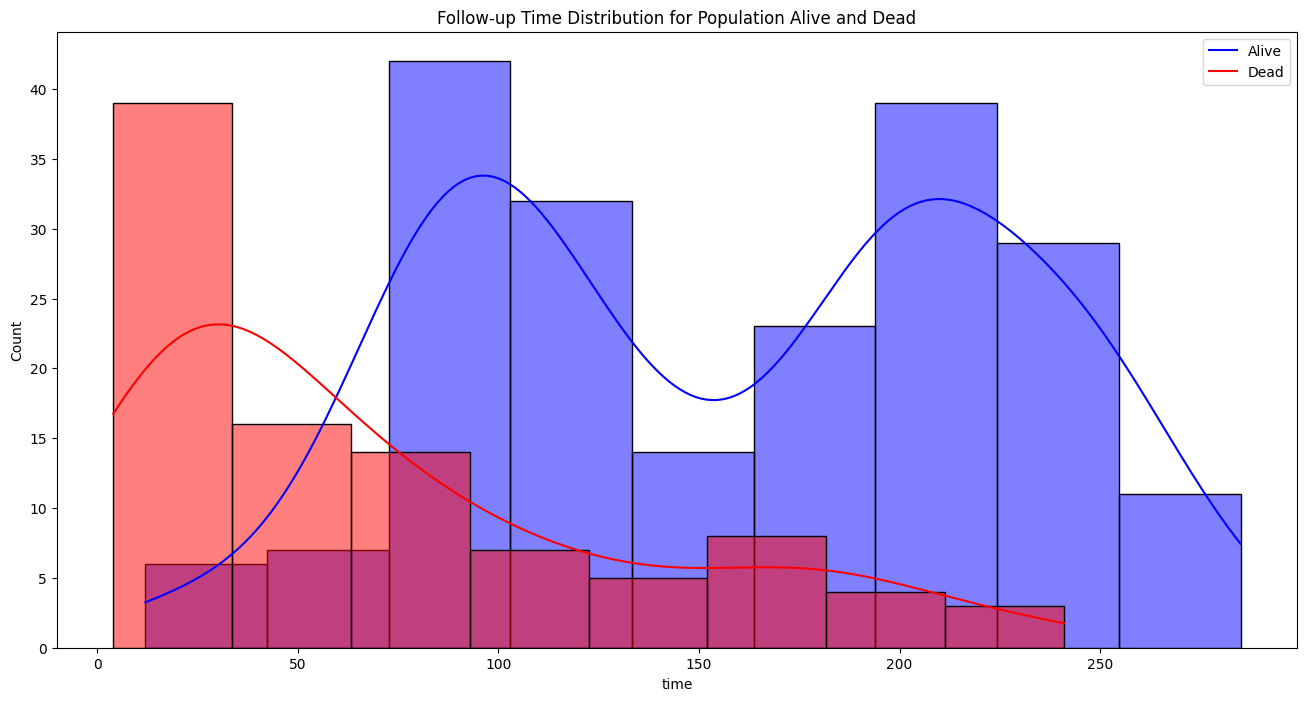

In [8]:
## Visualise the population follow-up time distribution between the alive and the dead
plt.figure(figsize=(16,8))
ax = sns.histplot(dfheart["time"][dfheart.DEATH_EVENT == 0], color="blue", kde=True), sns.histplot(dfheart["time"][dfheart.DEATH_EVENT == 1], color="red", kde=True)
plt.legend(['Alive', 'Dead'])
plt.title('Follow-up Time Distribution for Population Alive and Dead')

## Death cases are more likely to be rapid.

c:\Users\mmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='time'>

c:\Users\mmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

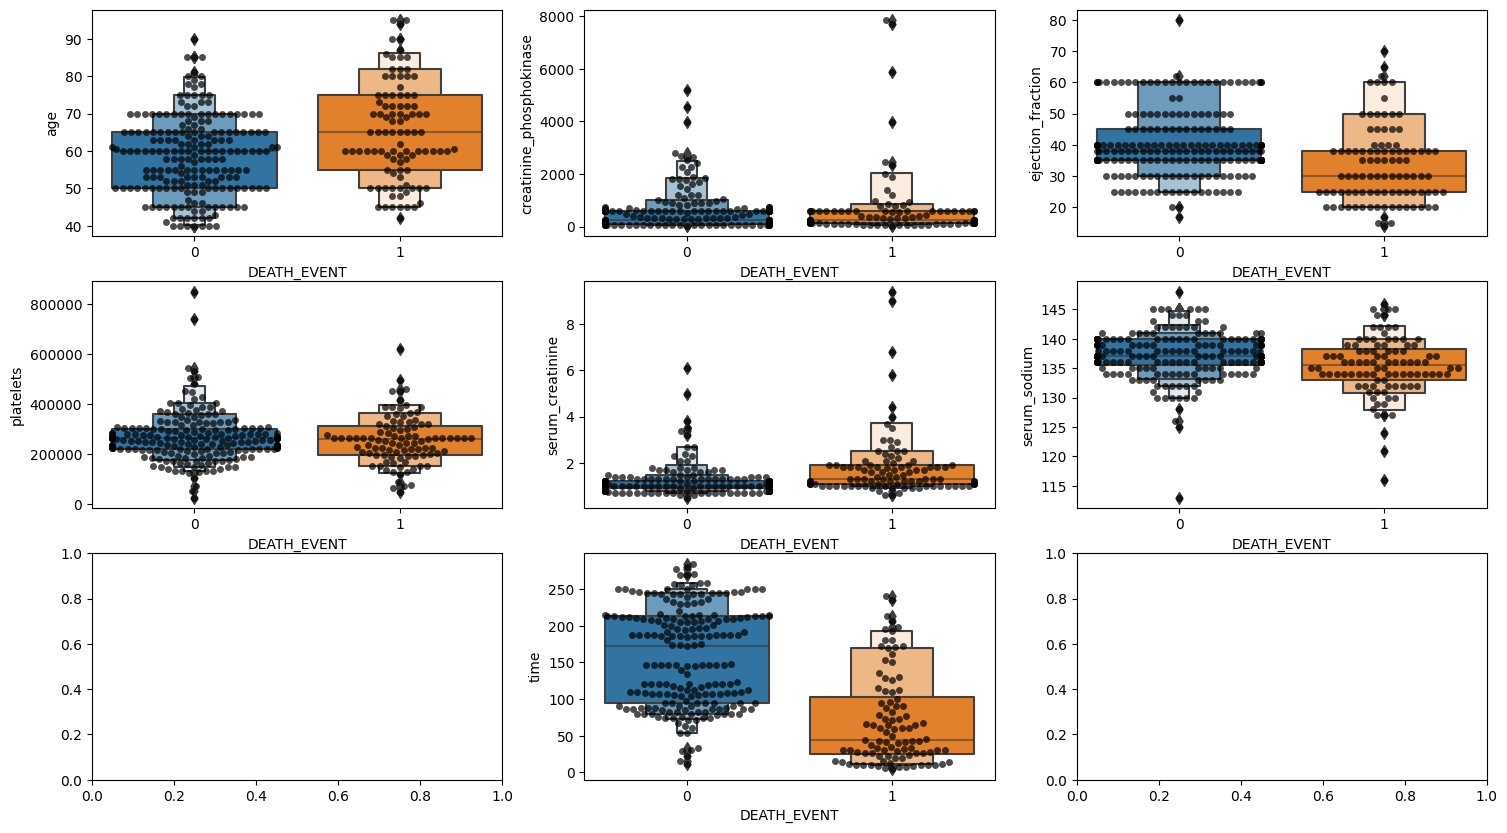

In [9]:
## boxplot on all non-dummy variables
fig, ax = plt.subplots(3,3,figsize=(18,10))
sns.swarmplot(ax=ax[0,0], x=dfheart["DEATH_EVENT"], y=dfheart["age"], color="black",alpha=0.7)
sns.boxenplot(ax=ax[0,0], x=dfheart["DEATH_EVENT"], y=dfheart["age"])
sns.swarmplot(ax=ax[0,1], x=dfheart["DEATH_EVENT"], y=dfheart["creatinine_phosphokinase"], color="black",alpha=0.7)
sns.boxenplot(ax=ax[0,1], x=dfheart["DEATH_EVENT"], y=dfheart["creatinine_phosphokinase"])
sns.swarmplot(ax=ax[0,2], x=dfheart["DEATH_EVENT"], y=dfheart["ejection_fraction"], color="black",alpha=0.7)
sns.boxenplot(ax=ax[0,2], x=dfheart["DEATH_EVENT"], y=dfheart["ejection_fraction"])
sns.swarmplot(ax=ax[1,0], x=dfheart["DEATH_EVENT"], y=dfheart["platelets"], color="black",alpha=0.7)
sns.boxenplot(ax=ax[1,0], x=dfheart["DEATH_EVENT"], y=dfheart["platelets"])
sns.swarmplot(ax=ax[1,1], x=dfheart["DEATH_EVENT"], y=dfheart["serum_creatinine"], color="black",alpha=0.7)
sns.boxenplot(ax=ax[1,1], x=dfheart["DEATH_EVENT"], y=dfheart["serum_creatinine"])
sns.swarmplot(ax=ax[1,2], x=dfheart["DEATH_EVENT"], y=dfheart["serum_sodium"], color="black",alpha=0.7)
sns.boxenplot(ax=ax[1,2], x=dfheart["DEATH_EVENT"], y=dfheart["serum_sodium"])
sns.swarmplot(ax=ax[2,1], x=dfheart["DEATH_EVENT"], y=dfheart["time"], color="black",alpha=0.7)
sns.boxenplot(ax=ax[2,1], x=dfheart["DEATH_EVENT"], y=dfheart["time"])

## Exisintg outliers in most variables, but not significant enough to affect the predictions given sample size and outlier numbers and values
## Need to scale given non-normal distribution in some variables

In [10]:
## defining independent and dependent variables
x=dfheart.drop(["DEATH_EVENT"],axis=1)
y=dfheart["DEATH_EVENT"]


In [11]:
## Scale up the data for prediction models
cols = list(x.columns)
scaler = StandardScaler()
scale_x = scaler.fit_transform(x)
dfscale_x = pd.DataFrame(scale_x, columns= cols)
dfscale_x.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,1.009969e-16,0.000000,9.060014e-17,-3.267546e-17,0.000000,7.723291e-17,1.425838e-16,-8.673849e-16,-8.911489e-18,-1.188199e-17,-1.901118e-16
std,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-8.711048e-01,-0.576918,-8.475794e-01,-2.038387e+00,-0.735688,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.359272e+00,-6.876819e-01,-1.629502e+00
25%,-8.281242e-01,-8.711048e-01,-0.480393,-8.475794e-01,-6.841802e-01,-0.735688,-5.208700e-01,-4.782047e-01,-5.959961e-01,-1.359272e+00,-6.876819e-01,-7.389995e-01
50%,-7.022315e-02,-8.711048e-01,-0.342574,-8.475794e-01,-7.076750e-03,-0.735688,-1.390846e-02,-2.845524e-01,8.503384e-02,7.356882e-01,-6.876819e-01,-1.969543e-01
75%,7.718891e-01,1.147968e+00,0.000166,1.179830e+00,5.853888e-01,1.359272,4.111199e-01,5.926150e-03,7.660638e-01,7.356882e-01,1.454161e+00,9.387595e-01
max,2.877170e+00,1.147968e+00,7.514640,1.179830e+00,3.547716e+00,1.359272,6.008180e+00,7.752020e+00,2.582144e+00,7.356882e-01,1.454161e+00,1.997038e+00


In [12]:
## train-test split 
x_train, x_test, y_train,y_test = train_test_split(scale_x,y,test_size=0.4,random_state=114514)

In [13]:
# Instantiating the SVM algorithm 
#Create a SVM Classifier
svm_linear = svm.SVC(kernel='linear')
svm_sigmoid = svm.SVC(kernel='sigmoid') 
svm_rbf = svm.SVC(kernel='rbf') 

# Fitting the model 
svm_linear.fit(x_train, y_train)
svm_sigmoid.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

# Predicting the test variables
y_pred_linear = svm_linear.predict(x_test)
y_pred_sigmoid = svm_sigmoid.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

# Getting the score 
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.7916666666666666
Sigmoid kernel Accuracy: 0.7833333333333333
rbf kernelAccuracy: 0.75


In [14]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
199,0,0
190,0,0
47,1,0
74,1,1
37,1,0
...,...,...
238,0,0
154,0,0
66,1,1
159,0,0


In [15]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
199,0,0
190,0,0
47,1,0
74,1,1
37,1,0
...,...,...
238,0,0
154,0,0
66,1,1
159,0,0


In [16]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
199,0,1
190,0,0
47,1,0
74,1,1
37,1,1
...,...,...
238,0,0
154,0,0
66,1,0
159,0,0


In [17]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[71  7]
 [18 24]]
[[71  7]
 [19 23]]
[[68 10]
 [20 22]]


<AxesSubplot: >

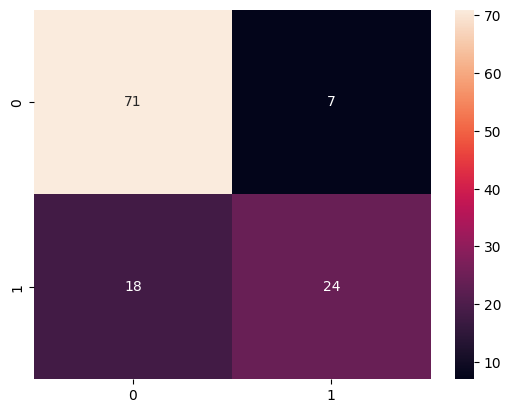

In [18]:
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

In [19]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        78
           1       0.77      0.57      0.66        42

    accuracy                           0.79       120
   macro avg       0.79      0.74      0.75       120
weighted avg       0.79      0.79      0.78       120



In [20]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.740842


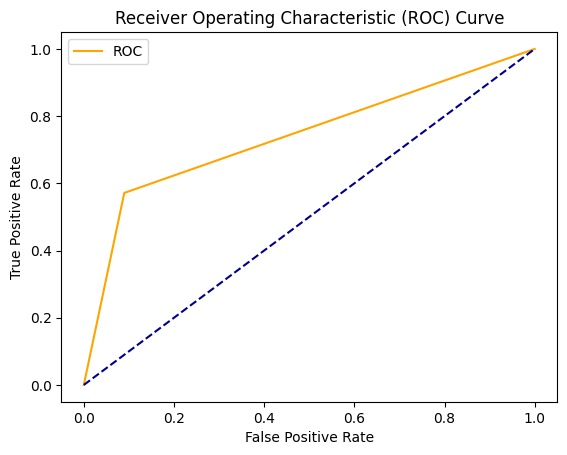

In [21]:
fpr, tpr = roc_curve(y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [22]:
# Build a logiReg Model
model_lr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print(model_lr.coef_)
## accuracy score
print(accuracy_score(y_test,y_pred_lr))
## confusion matrix
mat = confusion_matrix(y_test, y_pred_lr)
print(mat)
print(classification_report(y_test,y_pred_lr))
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})

[[ 0.46446338  0.16745158  0.28691045 -0.39234833 -0.94866713 -0.01510751
   0.00320002  0.67927447 -0.34796204 -0.1642484  -0.22752808 -1.26749785]]
0.7916666666666666
[[69  9]
 [16 26]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        78
           1       0.74      0.62      0.68        42

    accuracy                           0.79       120
   macro avg       0.78      0.75      0.76       120
weighted avg       0.79      0.79      0.79       120



,Actual,Predicted
199,0,0
190,0,0
47,1,0
74,1,1
37,1,0
...,...,...
238,0,0
154,0,0
66,1,1
159,0,0


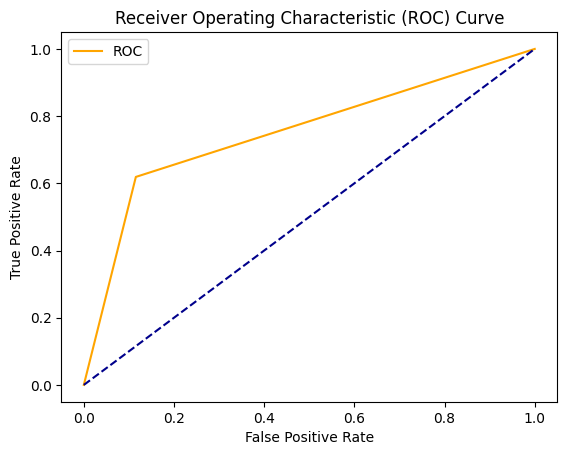

In [23]:
fpr, tpr = roc_curve(y_test, y_pred_lr)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [24]:
## Neural Network
## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 50, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer 1 
model.add(Dense(units= 20, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 1
model.add(Dropout(0.4))
## hidden layer 2
model.add(Dense(units= 4, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 2
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

## model
history = model.fit(x_train, y_train, batch_size = 25, epochs = 80, validation_split=0.25)

Epoch 1/80


c:\Users\mmm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


6/6 [==============================] - 2s 48ms/step - loss: 0.6927 - accuracy: 0.6791 - val_loss: 0.6914 - val_accuracy: 0.7556
Epoch 2/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6915 - accuracy: 0.6791 - val_loss: 0.6896 - val_accuracy: 0.7556
Epoch 3/80
6/6 [==============================] - 0s 12ms/step - loss: 0.6902 - accuracy: 0.6791 - val_loss: 0.6877 - val_accuracy: 0.7556
Epoch 4/80
6/6 [==============================] - 0s 7ms/step - loss: 0.6886 - accuracy: 0.6791 - val_loss: 0.6858 - val_accuracy: 0.7556
Epoch 5/80
6/6 [==============================] - 0s 7ms/step - loss: 0.6872 - accuracy: 0.6791 - val_loss: 0.6832 - val_accuracy: 0.7556
Epoch 6/80
6/6 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.6791 - val_loss: 0.6803 - val_accuracy: 0.7556
Epoch 7/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.6791 - val_loss: 0.6762 - val_accuracy: 0.7556
Epoch 8/80
6/6 [===========================

In [25]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 79.56%


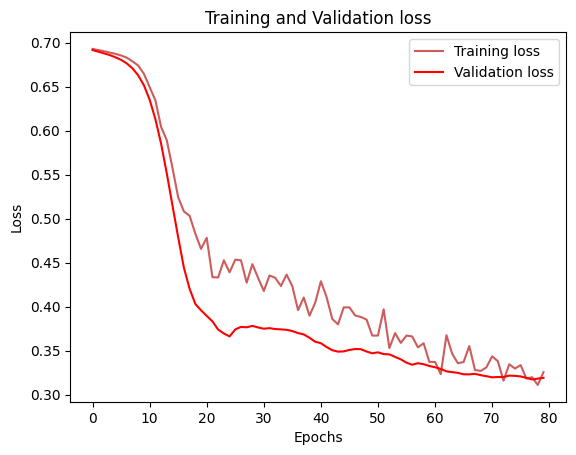

In [26]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

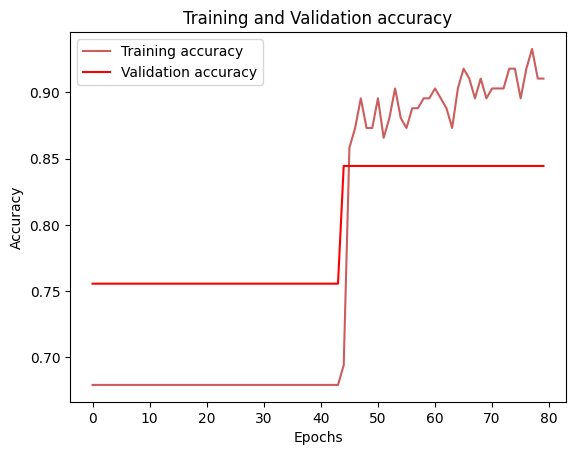

In [27]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [28]:
# Predicting the test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

4/4 [==============================] - 0s 1ms/step


<AxesSubplot: >

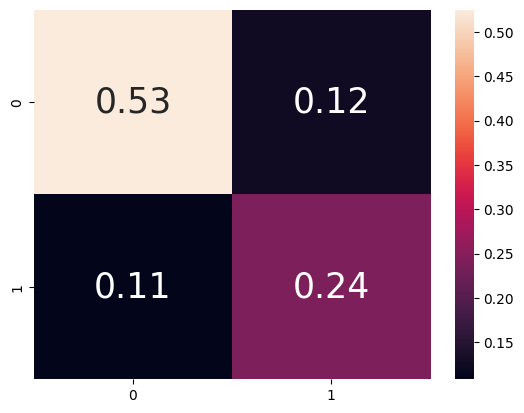

In [29]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        78
           1       0.66      0.69      0.67        42

    accuracy                           0.77       120
   macro avg       0.74      0.75      0.75       120
weighted avg       0.77      0.77      0.77       120



In [32]:
## save the ann model
model.save('heart_model.h5')